In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv, os, fnmatch, sys
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

CurrentWD = os.getcwd()
#obtain the current directory path for us so we don't have to manually find it
TestData = CurrentWD + "\Data\shortData ".replace(' ','')


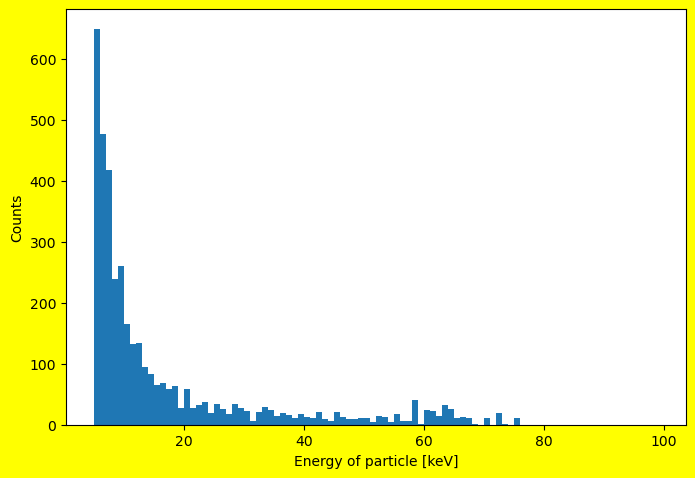

In [13]:
#First ShortData Test Run, moved from first load for clarity 
FullEngRun = []
for files in os.listdir(TestData + "\First"):
    EnergyArray = []
    EnergyArray = np.loadtxt(TestData + "\First\ ".replace(' ','') + files, delimiter=" ", dtype=float,
                     converters={0: lambda s: s[1:], -1: lambda s: s[:-1]})
    FullEngRun.append(EnergyArray)
    plt.figure(figsize=(8, 5.5), dpi=100,facecolor='yellow')
    plt.hist(x = EnergyArray.flatten(),bins = np.arange(5,100))
    plt.savefig(CurrentWD + "\OutFlow\FirstShortFiles/" + "histfor"+str(files).replace('.txt', '.png'),dpi = 300)
    plt.close()

FullEngRunHist = np.concatenate(FullEngRun,0).flatten()
plt.figure(figsize=(8, 5.5), dpi=100,facecolor='yellow')
plt.hist(x = FullEngRunHist,bins = np.arange(5,100))
plt.xlabel("Energy of particle [keV]")
plt.ylabel('Counts')
plt.savefig(CurrentWD + "\OutFlow\FirstShortFiles\FullRunHisto.png",dpi = 300)